## Lead Score Study

### Importing Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

## Importing the DataSet

### Reading Data

In [3]:
leads = pd.read_csv("D:\Data Science\GIT\Data_Science_Projects\Project 10 - Lead Scoring Assignment\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


## Step 1: Data Cleaning

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Installing missingno library for visualizing the null Values.

As in the dataset there are maximumn number of missing values so missingno library is very helpful to visualize all the missing values in each columns. 

### Installing the missingno library

In [6]:
!pip install missingno

<Axes: >

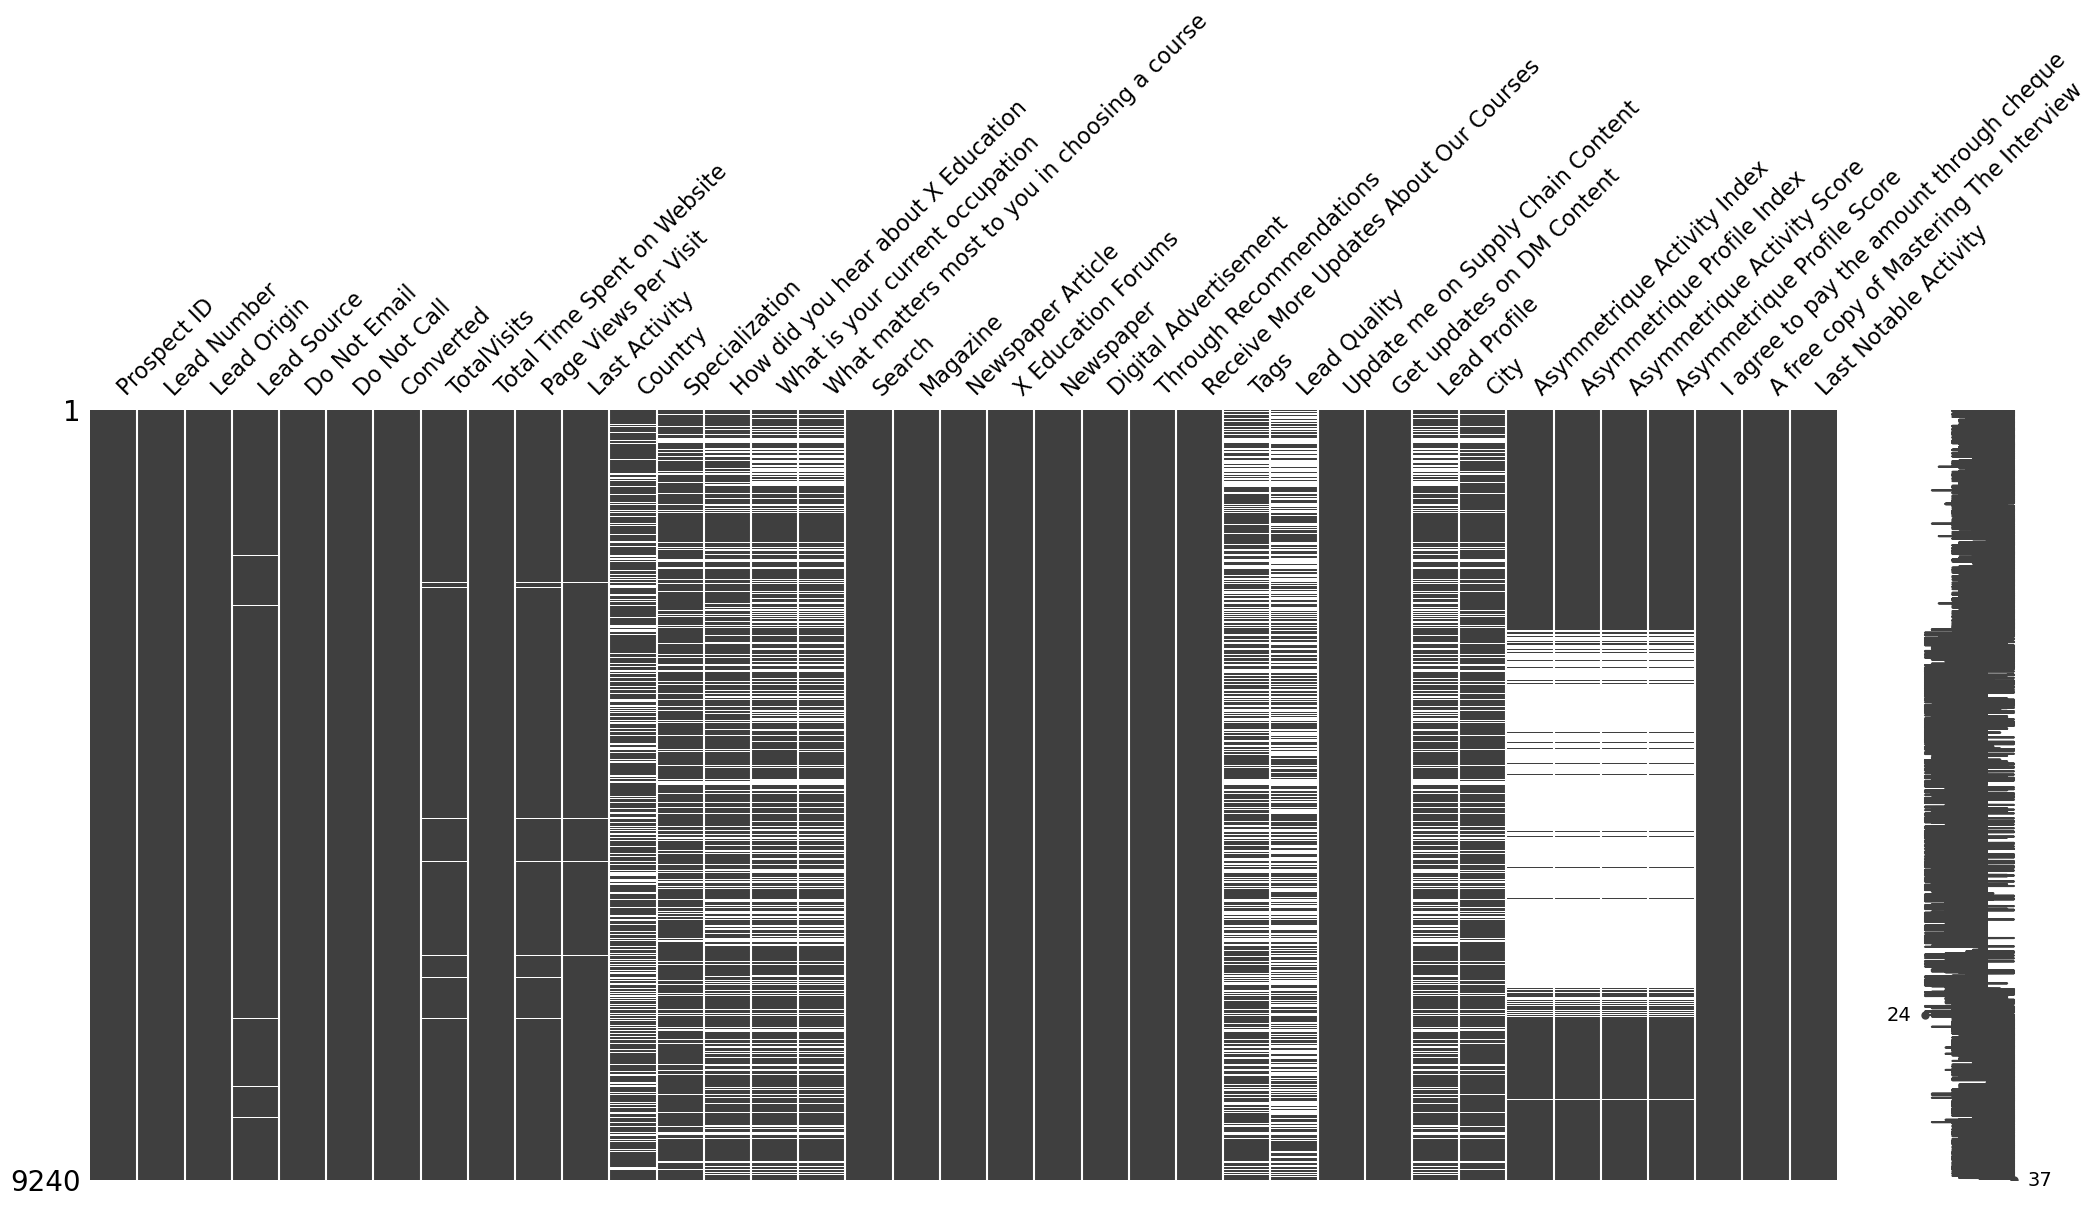

In [7]:
import missingno as msn
msn.matrix(leads)

### Checking the null values

In [8]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### A few columns seem to have Missing Values disguised as 'Select'

In [10]:
leads.City.replace('Select', np.NaN, inplace = True)
leads.Specialization.replace('Select', np.NaN, inplace = True)
leads['How did you hear about X Education'].replace('Select', np.NaN, inplace = True)

In [11]:
leads.shape

(9240, 37)

### Now let us see the true missing values

In [12]:
round((leads.isnull().sum()/leads.shape[0])*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping columns with more than 40% missing values

In [13]:
null_cols = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index',
             'Asymmetrique Profile Score','Asymmetrique Activity Score','How did you hear about X Education',]

In [14]:
leads.drop(null_cols, axis = 1, inplace = True)

### Checking for Binary Columns

In [15]:
leads['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [16]:
leads['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [17]:
leads['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [18]:
leads['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [19]:
leads['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [20]:
leads['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [21]:
leads['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [22]:
leads['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [23]:
leads['Search'].value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

In [24]:
leads['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [25]:
leads['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [26]:
leads['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [27]:
leads['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

### Dropping Highly Skewed Categorical Columns 

In [28]:
skewed_cols = ['Magazine','Newspaper Article','Do Not Call','Search','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Update me on Supply Chain Content',
               'I agree to pay the amount through cheque','Do Not Email','Get updates on DM Content']

In [29]:
leads.drop(skewed_cols, axis = 1, inplace = True)

## Analysing Lead Source

In [30]:
leads['Lead Source'].value_counts(normalize = True)*100

Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64

The data is skewed as majority of the categories contribute to only less than 10%. Clubbing them together as 'Social Media' after treating missing values

In [31]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace = True)

In [32]:
for i in range(len(leads['Lead Source'])):
    if (leads['Lead Source'][i] != 'Google') and (leads['Lead Source'][i] != 'Direct Traffic') and (leads['Lead Source'][i] != 'Olark Chat') and (leads['Lead Source'][i] != 'Organic Search') and (leads['Lead Source'][i] != 'Reference'):
        leads['Lead Source'][i] = leads['Lead Source'][i].replace(leads['Lead Source'][i],'Social Media')

In [33]:
leads['Lead Source'].value_counts(normalize = True)*100

Lead Source
Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Social Media       3.787879
Name: proportion, dtype: float64

In [34]:
leads['Lead Source'].isnull().sum()

0

### Lead Source Missing values have been treated

## Analysing "TotalVisits"

In [35]:
leads['TotalVisits'].fillna(round(leads['TotalVisits'].median(),2), inplace = True)

In [36]:
leads['TotalVisits'].isnull().sum()

0

### TotalVisits Missing values have been treated

### Treating Page Views Per Visit similarly

In [37]:
leads['Page Views Per Visit'].fillna(round(leads['Page Views Per Visit'].median(),2), inplace = True)

In [38]:
leads['Page Views Per Visit'].isnull().sum()

0

### Page Views Per Visit Missing values have been treated

Column City with 15% missing values, gives more information than the column Country which has 26% missing values. Retaining City and dropping Country

In [39]:
leads.drop(['Country'], axis = 1, inplace = True)

## Analysing City

In [40]:
leads.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

#### Here, we can treat Categories - Mumbai and Other Metro Cities - as Tier I, Thane & Outskirts as Tier II, and rest as Tier III

In [41]:
for i in range(len(leads)):
    if (leads.City[i] == 'Mumbai') or (leads.City[i] == 'Other Metro Cities'):
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier I Cities')
    if leads.City[i] == 'Thane & Outskirts':
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier II Cities')
    if (leads.City[i] == 'Other Cities') or (leads.City[i] == 'Other Cities of Maharashtra'):
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier III Cities')

In [42]:
leads.City.value_counts()

City
Tier I Cities      3602
Tier III Cities    1143
Tier II Cities      826
Name: count, dtype: int64

In [43]:
leads.City.isnull().sum()

3669

In [44]:
# We still have to treat these missing values
# Imputing the missing values with mode

leads.City.fillna(leads.City.mode()[0], inplace = True)

In [45]:
leads.City.isnull().sum()

0

In [46]:
leads.City.value_counts()

City
Tier I Cities      7271
Tier III Cities    1143
Tier II Cities      826
Name: count, dtype: int64

### City Missing values have been treated

In [47]:
leads['Specialization'].value_counts(normalize = True)*100

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

In [48]:
leads.Specialization.fillna('XNA' , inplace = True)
leads = leads.sort_values(by = 'Specialization', ascending = False)

### Following a similar approach like City to have the missing values distributed among the top three

In [49]:
random_Specialization = ['Finance Management','Human Resource Management', 'Marketing Management',
                         'Operations Management']

In [50]:
import random

In [51]:
for i in range(len(leads)):
    if leads.Specialization[i] == 'XNA':
        var = random.choice(random_Specialization)
        leads.Specialization[i] = leads.Specialization[i].replace(leads.Specialization[i], var)

#### Clubbing all Categories other than Finance, HR, Marketing, and Operations into Other Category

In [52]:
for i in range(len(leads)):
    if (leads.Specialization[i] != 'Finance Management') and (leads.Specialization[i] != 'Human Resource Management') and (leads.Specialization[i] != 'Marketing Management') and (leads.Specialization[i] != 'Operations Management'):
        leads.Specialization[i] = 'Other'

In [53]:
leads['Specialization'].value_counts(normalize = True)*100

Specialization
Other                        29.166667
Finance Management           19.935065
Marketing Management         18.917749
Human Resource Management    17.748918
Operations Management        14.231602
Name: proportion, dtype: float64

In [54]:
leads['Specialization'].isnull().sum()

0

### Specialization has been treated

In [55]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [56]:
leads['What is your current occupation'].isnull().sum()

2690

In [57]:
leads['What is your current occupation'].fillna('XNA' , inplace = True)
leads = leads.sort_values(by = 'What is your current occupation', ascending = False)

In [58]:
random_occupation = ['Unemployed', 'Working Professional', 'Student']

for i in range(len(leads)):
    if leads['What is your current occupation'][i] == 'XNA':
        var = random.choice(random_occupation)
        leads['What is your current occupation'][i] = leads['What is your current occupation'][i].replace(leads['What is your current occupation'][i], var)

In [59]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              6509
Working Professional    1617
Student                 1080
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Clubbing Housewife, Businessman into Other

In [60]:
for i in range(len(leads)):
    if (leads['What is your current occupation'][i] == 'Housewife') or (leads['What is your current occupation'][i] == 'Businessman'):
        leads['What is your current occupation'][i] = leads['What is your current occupation'][i].replace(leads['What is your current occupation'][i], 'Other')

In [61]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              6509
Working Professional    1617
Student                 1080
Other                     34
Name: count, dtype: int64

In [62]:
leads['What is your current occupation'].isnull().sum()

0

## Occupation column has been treated

In [63]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

### This column gives no information to us as all data points to "Better Career Prospects". Dropping this column

In [64]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

### Checking other categorical columns for better understanding

In [65]:
for i in range(len(leads)):
    if (leads['Lead Origin'][i] == 'Lead Import') or (leads['Lead Origin'][i] == 'Quick Add Form'):
        leads['Lead Origin'][i] = leads['Lead Origin'][i].replace(leads['Lead Origin'][i], 'Lead Add Form')

In [66]:
leads['Lead Origin'].value_counts(normalize = True)*100

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               8.376623
Name: proportion, dtype: float64

## Lead Origin has been treated

### Prospect ID and Lead Number convey the same information. Dropping Lead Number as this column is numeric

In [67]:
leads.drop(['Lead Number'], axis = 1, inplace = True)

### Let us convert 'A free copy of Mastering The Interview' to binary

In [68]:
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [69]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 2501 to 4204
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    5887 non-null   object

## Checking For Outliers

In [70]:
leads.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554
std,0.486714,4.819024,548.021466,2.145781,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000
90%,1.000000,7.000000,1380.000000,5.000000,1.000000
95%,1.000000,10.000000,1562.000000,6.000000,1.000000
99%,1.000000,17.000000,1840.610000,9.000000,1.000000


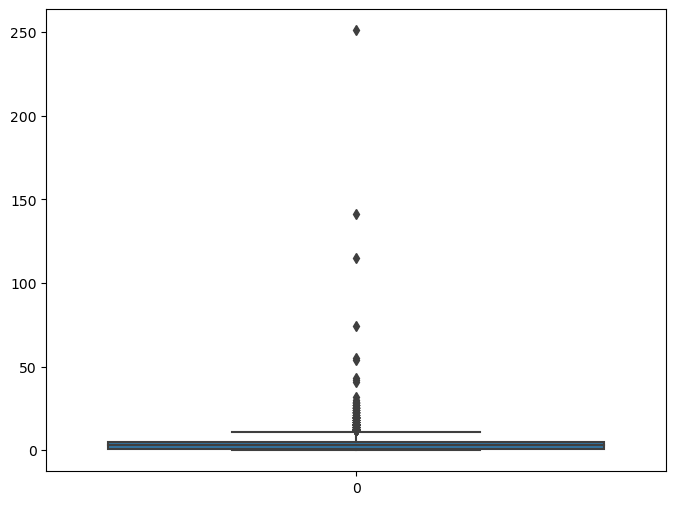

In [71]:
plt.figure(figsize = [8,6])
sns.boxplot(data=leads['TotalVisits'])
plt.show()

### - We can see that Total Visits and Page Views Per Visit have outliers
- Assuming that a customer will not have visited the page more than 30 times

In [72]:
leads = leads[leads.TotalVisits < 30]

In [73]:
leads.shape

(9229, 15)

## Univariate Analysis

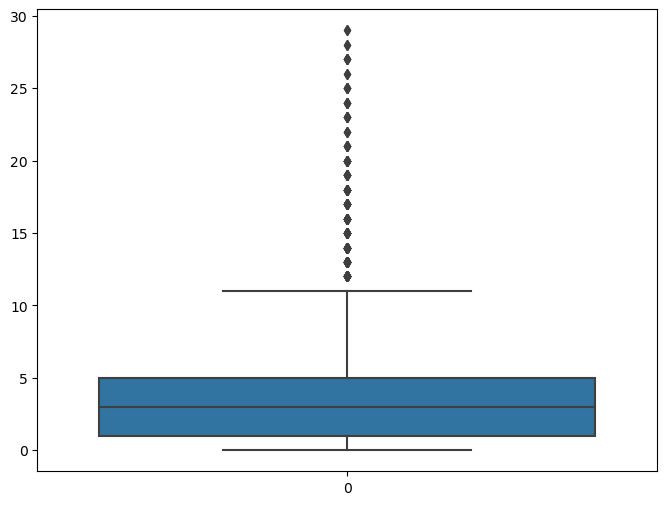

In [74]:
plt.figure(figsize = [8,6])
sns.boxplot(data = leads['TotalVisits'])
plt.show()

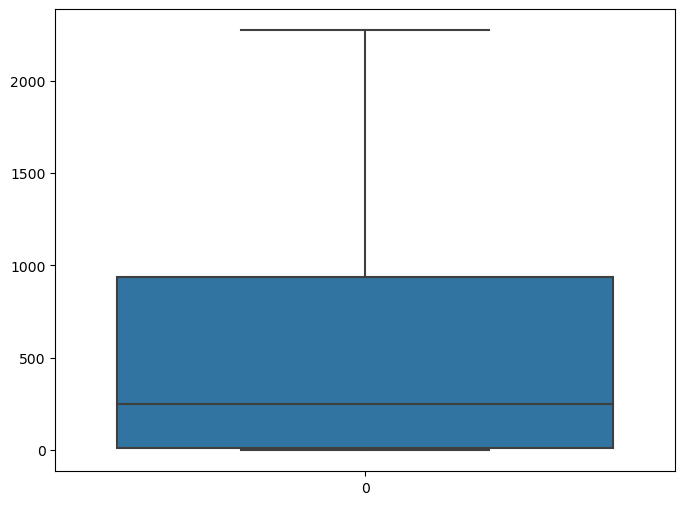

In [75]:
plt.figure(figsize = [8,6])
sns.boxplot(data = leads['Total Time Spent on Website'])
plt.show()

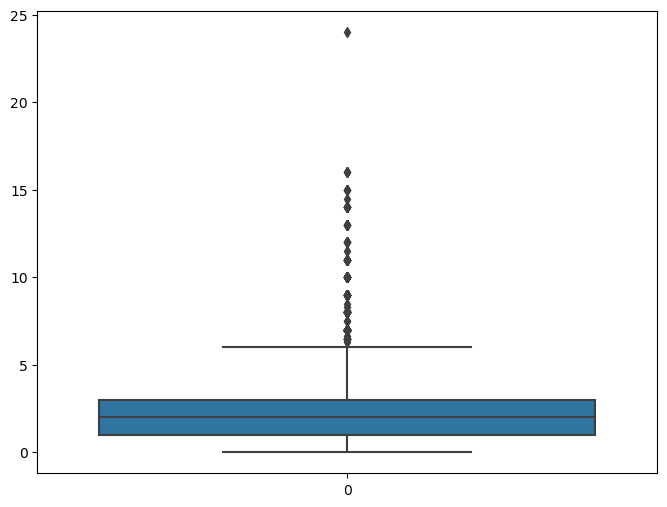

In [76]:
plt.figure(figsize = [8,6])
sns.boxplot(data = leads['Page Views Per Visit'])
plt.show()

## Multivariate Analysis

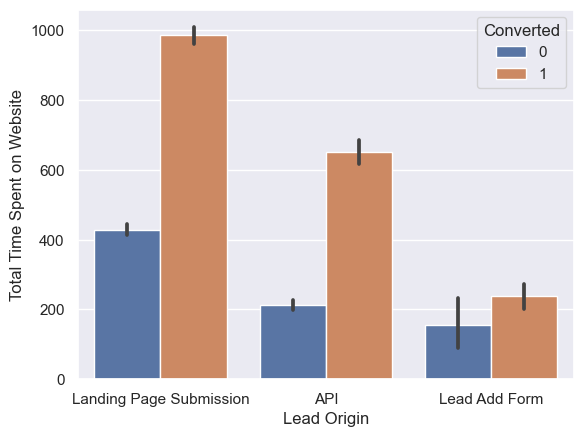

In [77]:
sns.set_theme()
sns.barplot(x = leads['Lead Origin'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.show()

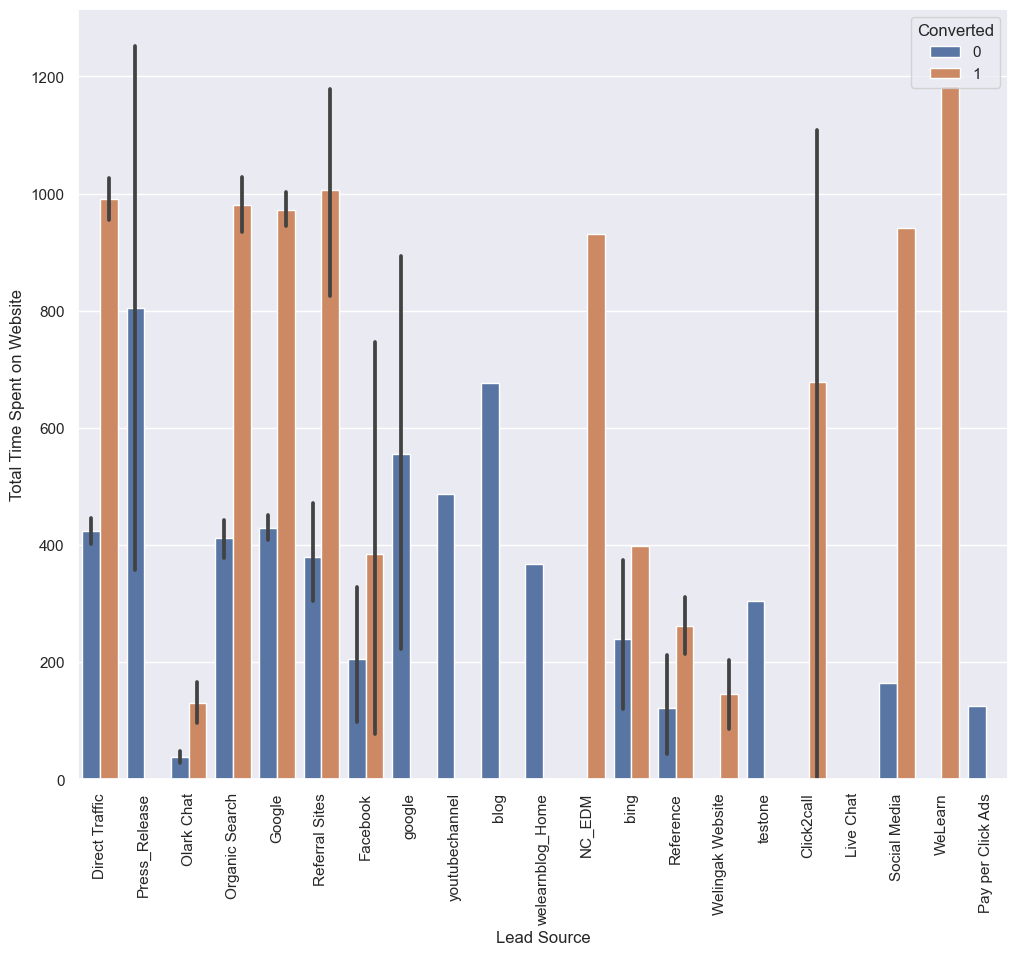

In [78]:
plt.figure(figsize = [12,10])
sns.set_theme()
sns.barplot(x = leads['Lead Source'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

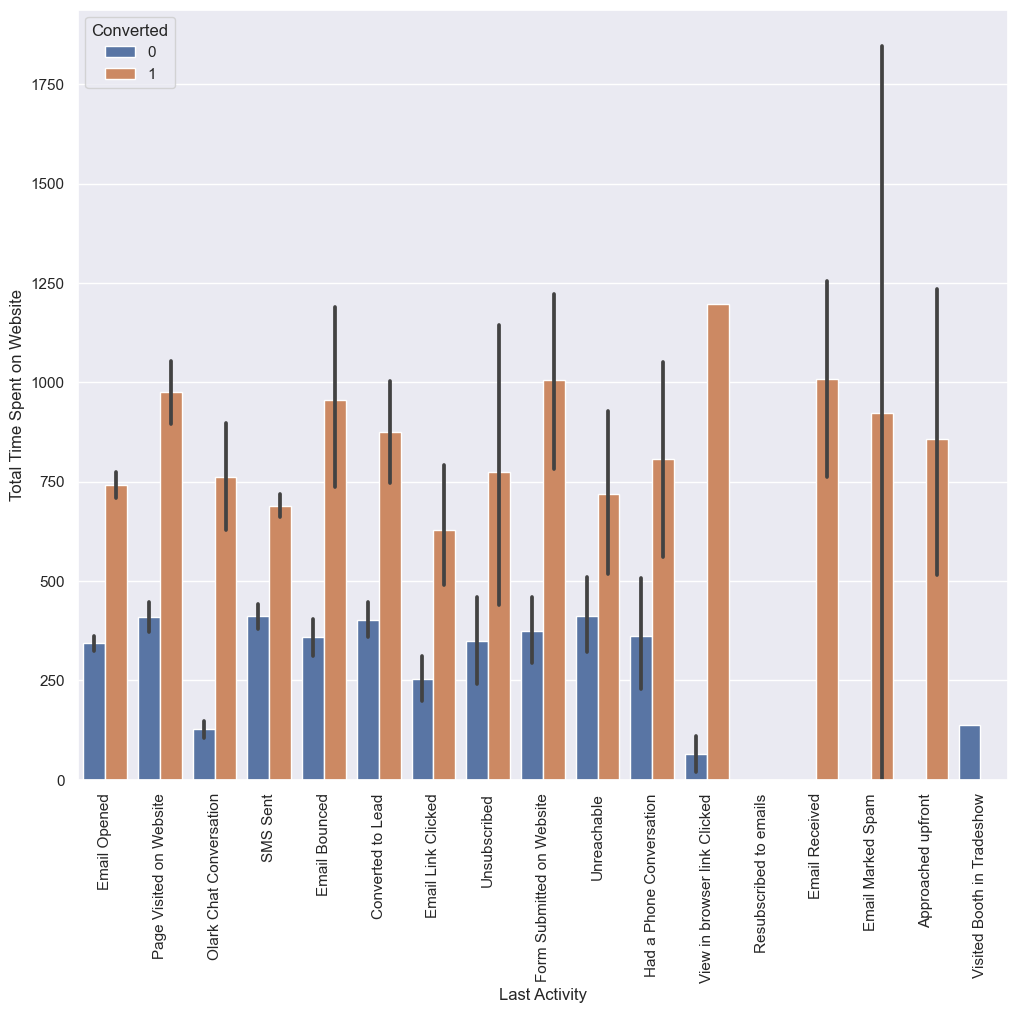

In [79]:
plt.figure(figsize = [12,10])
sns.set_theme()
sns.barplot(x = leads['Last Activity'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

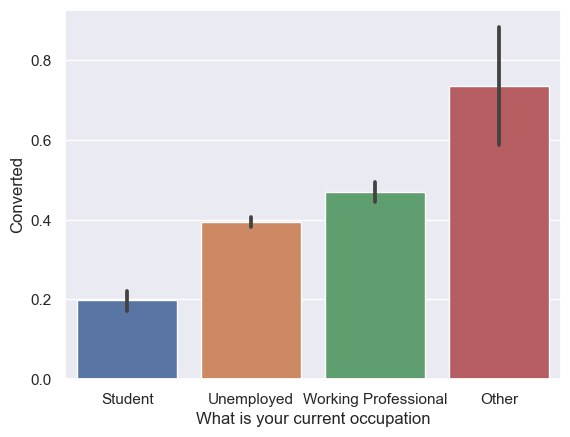

In [80]:
sns.set_theme()
sns.barplot(x = leads['What is your current occupation'], y = leads['Converted'])
plt.show()

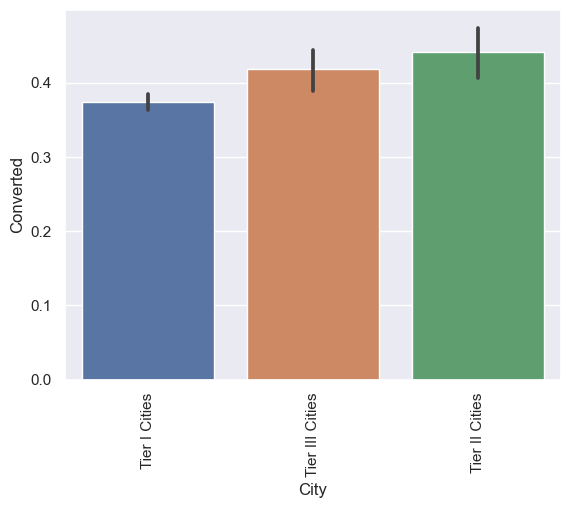

In [81]:
sns.set_theme()
sns.barplot(x = leads['City'], y = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

<Figure size 2400x2400 with 0 Axes>

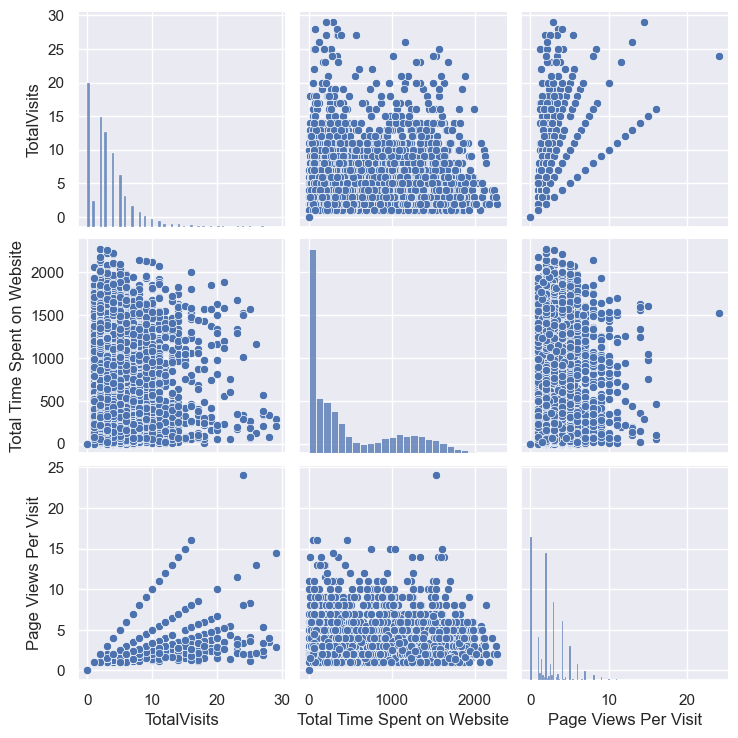

In [82]:
numerical_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = [24,24])
sns.pairplot(leads[numerical_cols])
plt.show()

## Dropping the columns that are generated by the sales team which we do not need in our analysis

In [83]:
sales_cols = ['Last Activity','Lead Profile','Last Notable Activity','Tags']

In [84]:
leads.drop(sales_cols, axis = 1, inplace = True)

In [85]:
leads.shape

(9229, 11)

# STEP 2: Data Preparation
    - Creating Dummies for Categorical Variables
    - Performing Train-Test Split
    - Performing Scaling

In [86]:
# Reassranging columns for seggregating categorical and numerical columns 

leads = leads[['Prospect ID','Lead Origin', 'Lead Source', 'Specialization',
                 'What is your current occupation','City','A free copy of Mastering The Interview',
                'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

In [87]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
2501,0fced7d9-80fb-45fd-ae24-9b81431800c9,Landing Page Submission,Direct Traffic,Operations Management,Student,Tier I Cities,1,10.0,1395,5.0,0
7505,78318c39-6b46-4e70-a587-29837cee1b4e,Landing Page Submission,Press_Release,Other,Unemployed,Tier I Cities,1,12.0,1252,12.0,0
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,API,Olark Chat,Human Resource Management,Unemployed,Tier I Cities,0,0.0,0,0.0,0
624,ff8daf82-a795-4276-8443-67437cec918c,Landing Page Submission,Organic Search,Other,Student,Tier III Cities,1,3.0,145,3.0,0
6520,68ce5663-48b6-4674-9b42-f5c7cd9079d0,Landing Page Submission,Direct Traffic,Other,Unemployed,Tier I Cities,1,3.0,385,3.0,0


In [88]:
categorical_cols = ['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']

### Creating Dummies for Categorical columns

In [89]:
for col_name in categorical_cols:
    new_df = pd.get_dummies(leads[col_name], prefix = col_name, drop_first = True)
    leads = pd.concat([leads, new_df], axis = 1)
    leads.drop(col_name, axis = 1, inplace = True)

In [90]:
leads.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_youtubechannel,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2501,0fced7d9-80fb-45fd-ae24-9b81431800c9,1,10.0,1395,5.0,0,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7505,78318c39-6b46-4e70-a587-29837cee1b4e,1,12.0,1252,12.0,0,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,0,0.0,0,0.0,0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
624,ff8daf82-a795-4276-8443-67437cec918c,1,3.0,145,3.0,0,True,False,False,False,...,False,False,False,False,True,True,False,False,False,True
6520,68ce5663-48b6-4674-9b42-f5c7cd9079d0,1,3.0,385,3.0,0,True,False,True,False,...,False,False,False,False,True,False,True,False,False,False


### Performing Test-Train Split

In [91]:
df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)

In [92]:
numerical_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [93]:
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_youtubechannel,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2765,8e5f90b6-cf07-4d59-a22a-bc3f34048b98,0,0.000000,0.000000,0.000000,1,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
7499,383d9485-5859-4e11-b9b7-31325357b4d3,0,0.068966,0.143926,0.083333,0,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
709,4d00b9be-fa39-44fd-8a9f-ed5960d80c77,0,0.034483,0.529489,0.041667,1,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4635,288c7a59-3294-4e8f-89ec-c25620abfe24,1,0.103448,0.245599,0.125000,1,True,False,True,False,...,False,False,False,False,True,False,True,False,False,False
5699,2dda3090-e7a8-40dc-8817-8dd9a46c0e67,0,0.000000,0.000000,0.000000,1,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


### Converting some binary variable (True/False) into 1 and 0

In [94]:
df_train.columns

Index(['Prospect ID', 'A free copy of Mastering The Interview', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Converted',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What i

In [96]:
#Taking all Binary columns to be replace with 1 and 0

columns_to_replace = ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_Tier III Cities']

In [97]:
df_train[columns_to_replace] = df_train[columns_to_replace].applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [98]:
df_train.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_youtubechannel,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2765,8e5f90b6-cf07-4d59-a22a-bc3f34048b98,0,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7499,383d9485-5859-4e11-b9b7-31325357b4d3,0,0.068966,0.143926,0.083333,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
709,4d00b9be-fa39-44fd-8a9f-ed5960d80c77,0,0.034483,0.529489,0.041667,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4635,288c7a59-3294-4e8f-89ec-c25620abfe24,1,0.103448,0.245599,0.125000,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
5699,2dda3090-e7a8-40dc-8817-8dd9a46c0e67,0,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


### Confirming if all the values are now between 0 and 1

In [99]:
df_train.describe()

,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_youtubechannel,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
count,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,...,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000
mean,0.313313,0.116510,0.218230,0.098172,0.388390,0.525697,0.082663,0.269350,0.005882,0.318885,...,0.000155,0.180186,0.188390,0.141331,0.293963,0.119040,0.703096,0.173994,0.090402,0.124923
std,0.463876,0.117510,0.243020,0.086358,0.487422,0.499378,0.275393,0.443656,0.076477,0.466081,...,0.012442,0.384372,0.391054,0.348390,0.455610,0.323861,0.456929,0.379134,0.286780,0.330657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034483,0.007042,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.103448,0.111796,0.083333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.172414,0.416813,0.125000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
y_train = df_train.Converted
X_train = df_train.drop(['Converted','Prospect ID'],axis =1)

In [101]:
X_train.shape

(6460, 35)

In [102]:
y_train.shape

(6460,)

In [103]:
y_test = df_test.Converted
X_test = df_test.drop(['Converted','Prospect ID'],axis =1)

In [104]:
X_test.shape

(2769, 35)

In [105]:
y_test.shape

(2769,)

### Checking correlation between the numerical columns to understand the data better

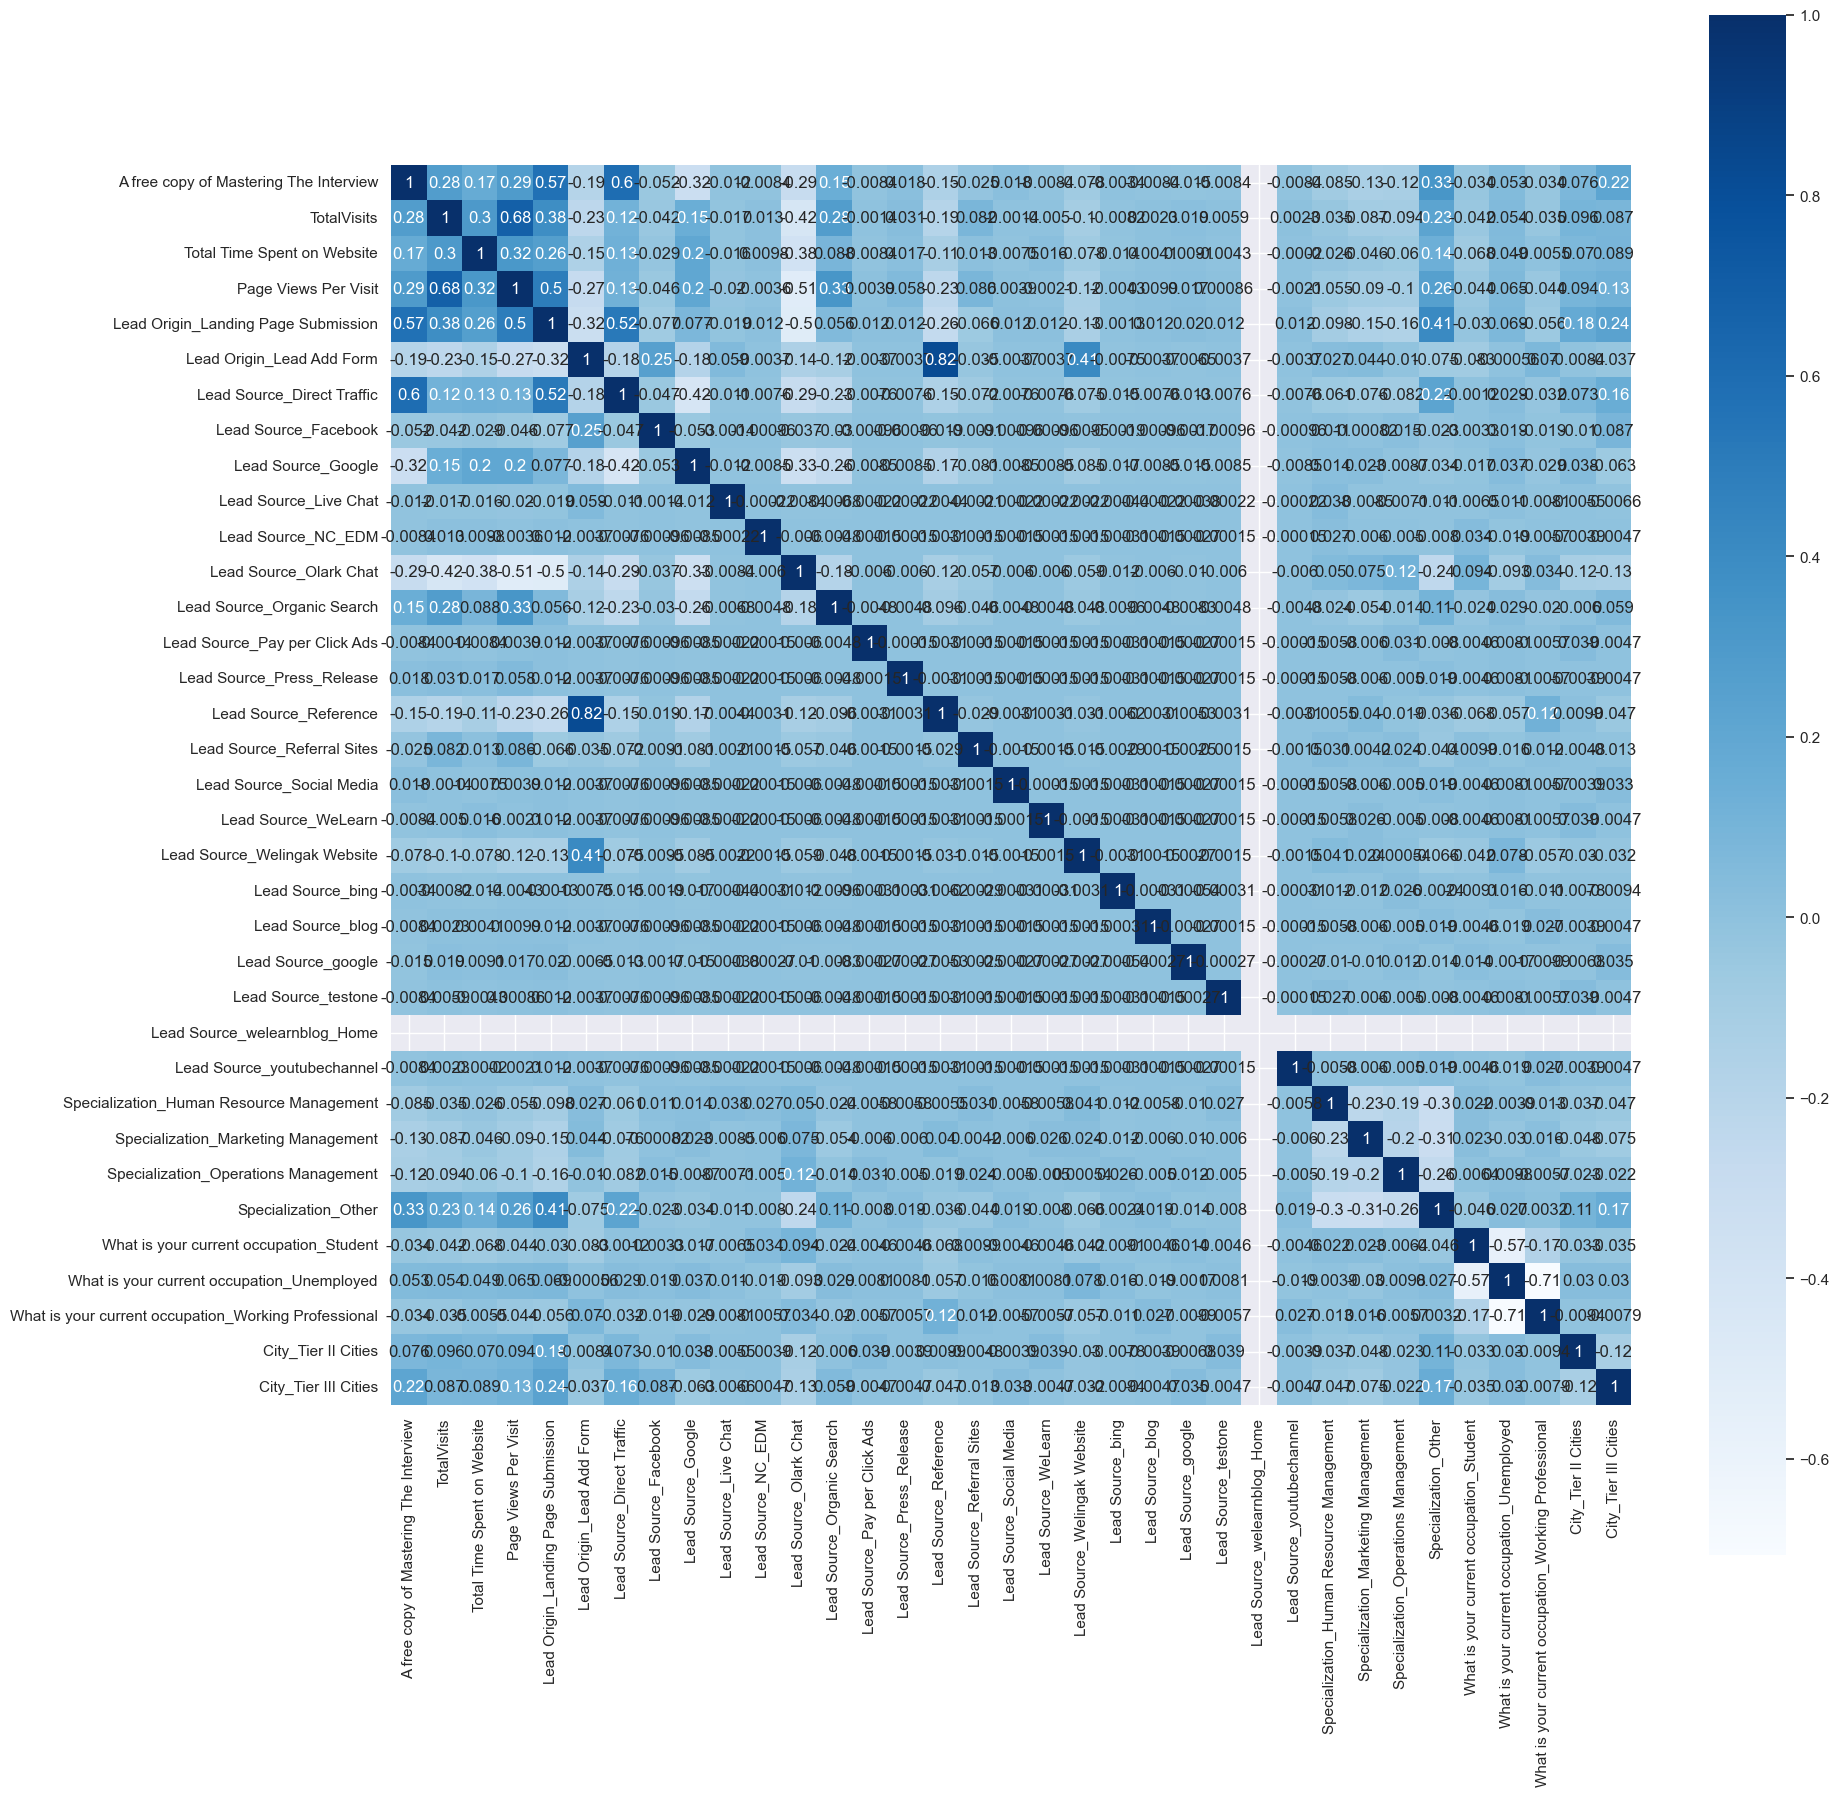

In [106]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

### - It is evident that there is high multicollinearity. Dropping the columns causing that

In [107]:
drop_cols = ['Lead Origin_Landing Page Submission','TotalVisits',
             'A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search']

In [108]:
# Here, some columns that have obvious relations - like being a student and being unemployed,
# or being a working professional v/s being unemployed have been omitted on purpose

In [109]:
# Dropping the columns to overcome multicollinearity

X_train.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

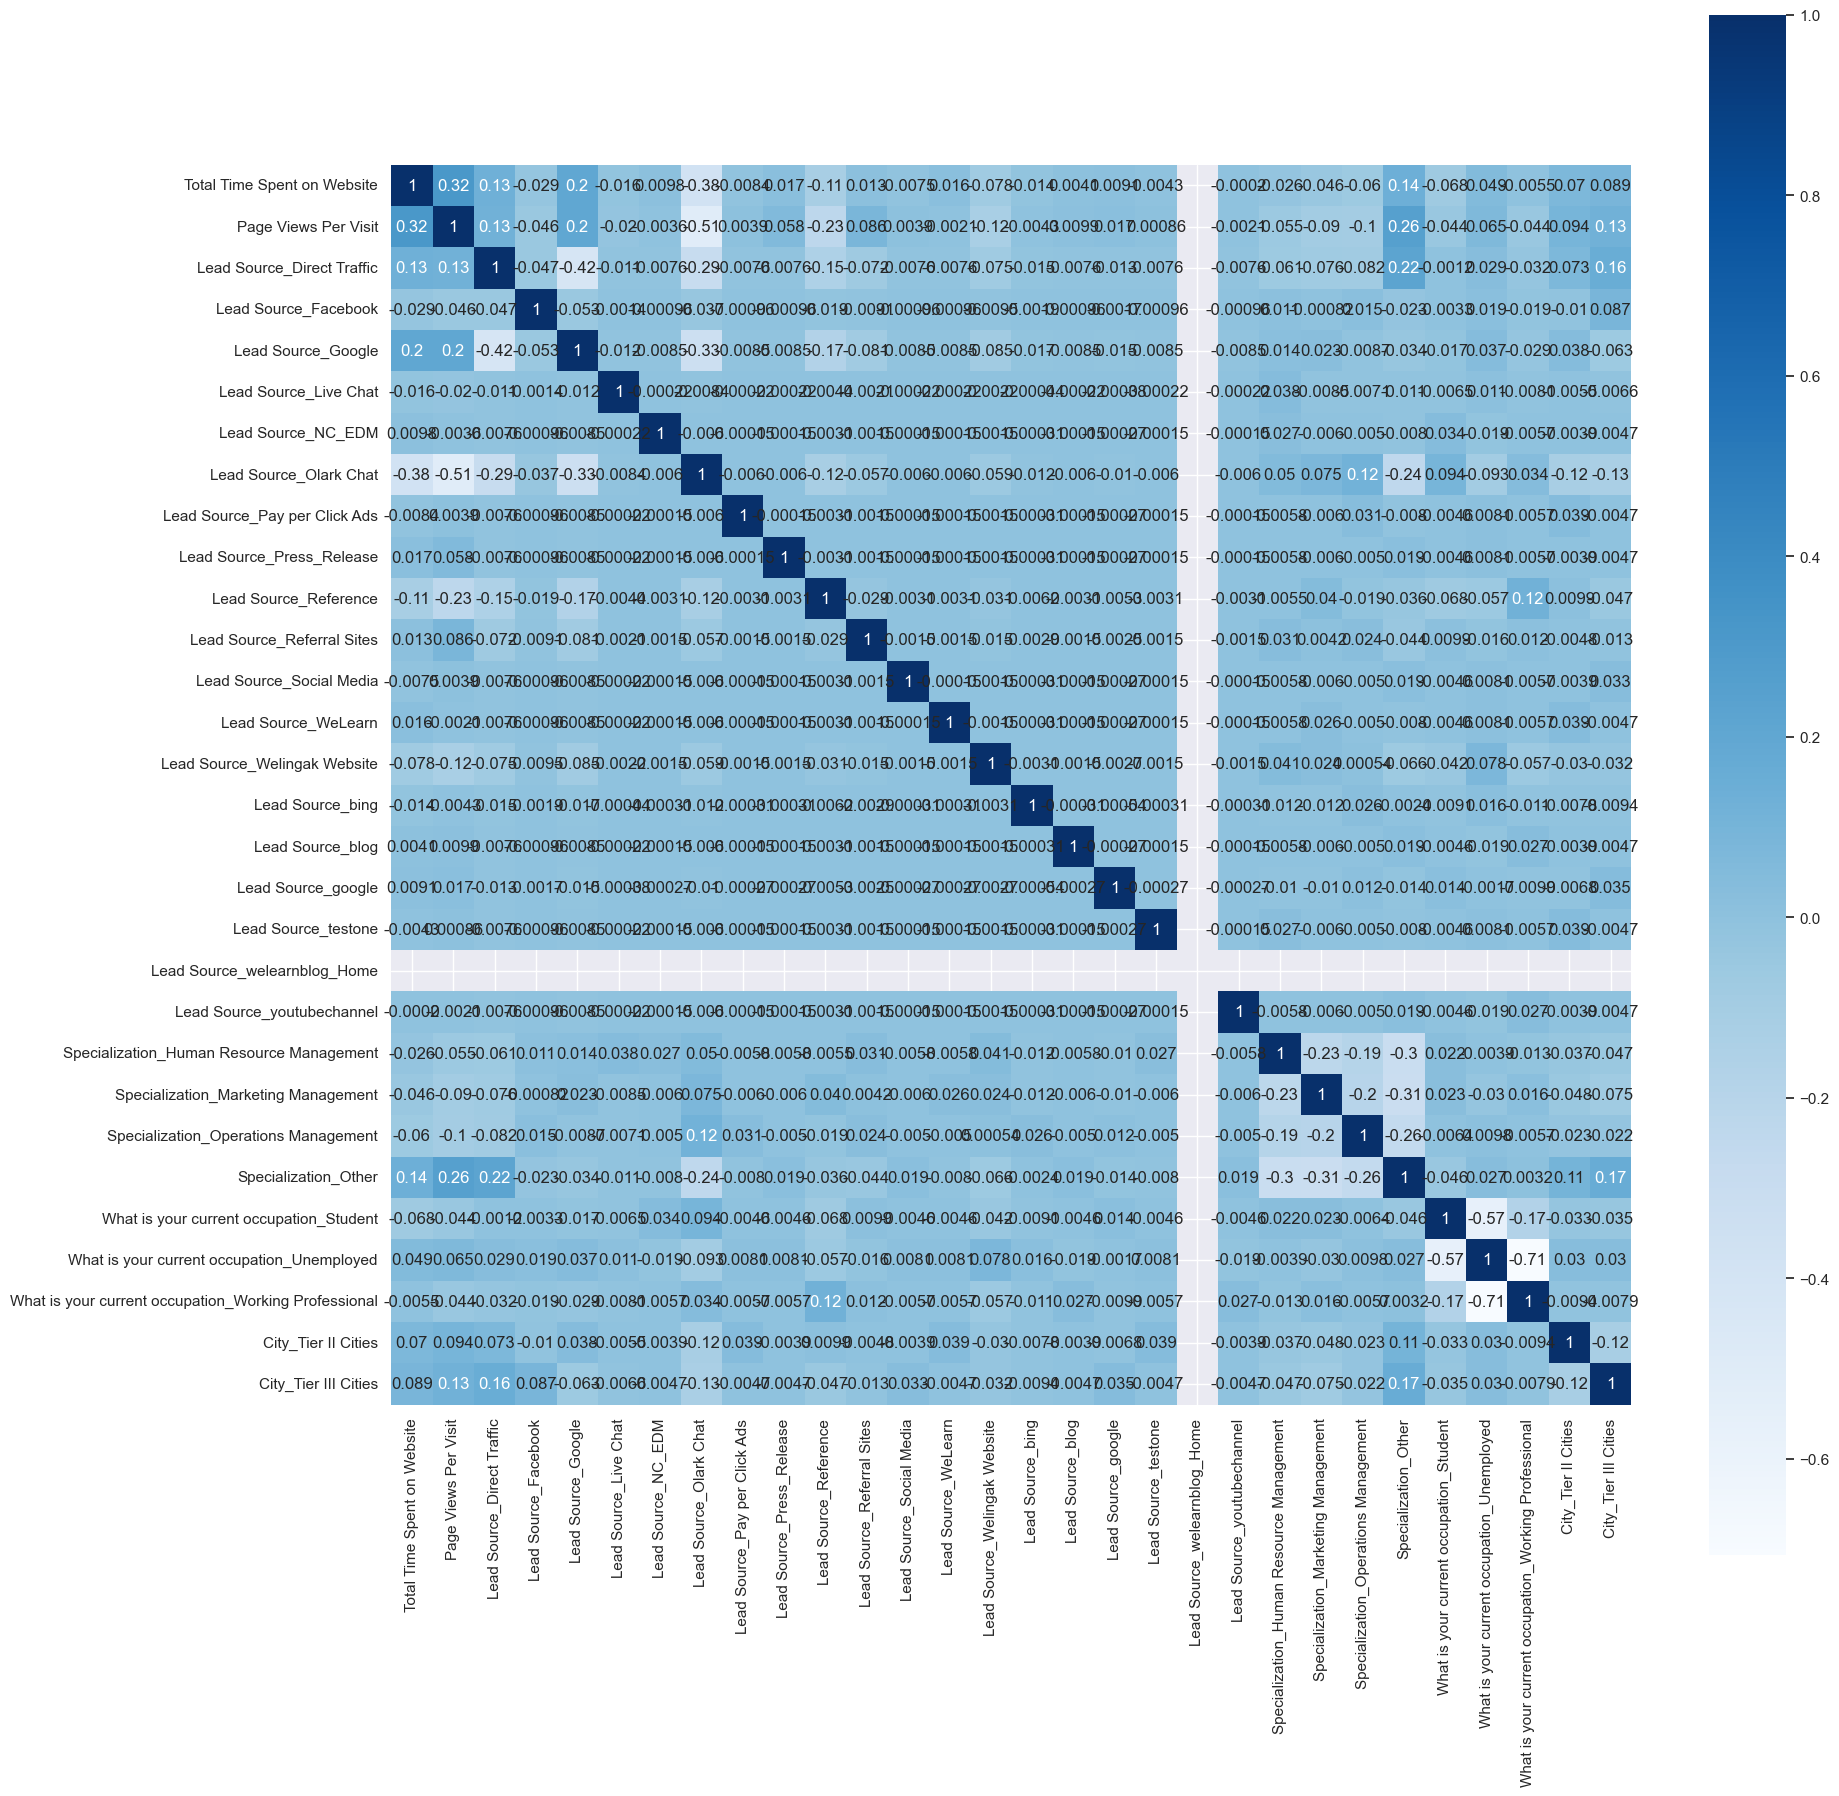

In [111]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

# STEP 3: Modelling
    - Variable selection using RFE
    - Building a Logistic Model with good sensitivity
    - Check p-value and VIF
    - Find optimal probability cut-off
    - Check model performance over test data
    - Generate Score variable

In [112]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3247.8
Date:                Sat, 13 Jan 2024   Deviance:                       6495.7
Time:                        16:50:48   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2815
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2817      0.570     -0.494      0.621      -1.399       0.835
Total Time Spent on Website                              4.5278      0.148     30.548      0.000       4.237       4.818
Page Views Per Visit                                     0.0146      0.466      0.031      0.975      -0.898       0.928
Lead Source_Direct Traffic                              -0.2992      0.104     -2.871      0.004      -0.504      -0.095
Lead Source_Facebook                                     0.1448      0.432      0.335      0.737      -0.702       0.991
Lead Source_Google                                       0.1521      0.099      1.532      0.126      -0.043       0.347
Lead Source_Live Chat                                   24.5289   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      23.3887   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.7234      0.137      5.263      0.000       0.454       0.993
Lead Source_Pay per Click Ads                          -21.0141   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Press_Release                              -23.3170   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                                    4.1323      0.234     17.641      0.000       3.673       4.591
Lead Source_Referral Sites                              -0.6306      0.297     -2.121      0.034      -1.213      -0.048
Lead Source_Social Media                               -21.3492   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_WeLearn                                     21.9197   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                             5.6971      0.726      7.849      0.000       4.274       7.120
Lead Source_bing                                         0.4271      1.175      0.363      0.716      -1.876       2.730
Lead Source_blog                                       -22.5229   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                                     -21.9491   2.63e+04     -0.001      0.999   -5.15e+04    5.15e+04
Lead Source_testone                                    -21.3937   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_welearnblog_Home                          -4.48e-15   2.05e-11     -0.000      1.000   -4.01e-11    4.01e-11
Lead Source_youtubechannel                             -22.1430   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Specialization_Human Resource Management                 0

## Feature Selection using RFE

In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [118]:
# logreg = LogisticRegression()
# rfe = RFE(logreg,12)
# rfe = rfe.fit(X_train,y_train)

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([ True, False, False, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', False, 2),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 8),
 ('Lead Source_welearnblog_Home', False, 19),
 ('Lead Source_youtubechannel', False, 4),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_Marketing Management', False, 13),
 ('Specialization_Operations Management', False, 17),
 ('Specializati

In [121]:
col = X_train.columns[rfe.support_]

In [122]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Pay per Click Ads', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'City_Tier II Cities', 'City_Tier III Cities'],
      dtype='object')

### Assessing the model with statsmodel

In [124]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3273.4
Date:                Sat, 13 Jan 2024   Deviance:                       6546.7
Time:                        16:56:43   Pearson chi2:                 6.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0832      0.553     -0.151      0.880      -1.167       1.000
Total Time Spent on Website                              4.5408      0.147     30.867      0.000       4.252       4.829
Lead Source_Live Chat                                   24.4426   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      23.3183   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.6562      0.088      7.429      0.000       0.483       0.829
Lead Source_Press_Release                              -23.1918   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                                    4.1158      0.209     19.654      0.000       3.705       4.526
Lead Source_Referral Sites                              -0.6602      0.285     -2.315      0.021      -1.219      -0.101
Lead Source_Welingak Website                             5.6176      0.718      7.826      0.000       4.211       7.024
Lead Source_google                                     -21.9908   2.58e+04     -0.001      0.999   -5.06e+04    5.06e+04
What is your current occupation_Student                 -2.5297      0.561     -4.511      0.000      -3.629      -1.431
What is your current occupation_Unemployed              -1.7933      0.553     -3.244      0.001      -2.877      -0.710
What is your current occupation_Working Professional    -1.4431      0.556     -2.595      0.009      -2.533      -0.353
========================================================================================================================
"""

### Let us drop the column with the highest p-value

In [125]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3273.4
Date:                Sat, 13 Jan 2024   Deviance:                       6546.7
Time:                        16:56:57   Pearson chi2:                 6.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0832      0.553     -0.151      0.880      -1.167       1.000
Total Time Spent on Website                              4.5408      0.147     30.867      0.000       4.252       4.829
Lead Source_Live Chat                                   24.4426   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      23.3183   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.6562      0.088      7.429      0.000       0.483       0.829
Lead Source_Press_Release                              -23.1918   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                                    4.1158      0.209     19.654      0.000       3.705       4.526
Lead Source_Referral Sites                              -0.6602      0.285     -2.315      0.021      -1.219      -0.101
Lead Source_Welingak Website                             5.6176      0.718      7.826      0.000       4.211       7.024
Lead Source_google                                     -21.9908   2.58e+04     -0.001      0.999   -5.06e+04    5.06e+04
What is your current occupation_Student                 -2.5297      0.561     -4.511      0.000      -3.629      -1.431
What is your current occupation_Unemployed              -1.7933      0.553     -3.244      0.001      -2.877      -0.710
What is your current occupation_Working Professional    -1.4431      0.556     -2.595      0.009      -2.533      -0.353
========================================================================================================================
"""

In [129]:
col

Index(['Total Time Spent on Website', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [130]:
col = col.drop('What is your current occupation_Working Professional')

In [131]:
X_train_sm = sm.add_constant(X_train[col])
res = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3277.2
Date:                Sat, 13 Jan 2024   Deviance:                       6554.4
Time:                        16:59:09   Pearson chi2:                 6.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2749
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.4975      0.085    -17.656      0.000      -1.664      -1.331
Total Time Spent on Website                    4.5409      0.147     30.892      0.000       4.253       4.829
Lead Source_Live Chat                         24.4417   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                            23.3170   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         0.6517      0.088      7.384      0.000       0.479       0.825
Lead Source_Press_Release                    -23.1928   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                          4.1111      0.209     19.637      0.000       3.701       4.521
Lead Source_Referral Sites                    -0.6691      0.285     -2.344      0.019      -1.229      -0.110
Lead Source_Welingak Website                   5.6167      0.718      7.825      0.000       4.210       7.024
Lead Source_google                           -21.9915   2.58e+04     -0.001      0.999   -5.06e+04    5.05e+04
What is your current occupation_Student       -1.1142      0.122     -9.121      0.000      -1.354      -0.875
What is your current occupation_Unemployed    -0.3782      0.079     -4.815      0.000      -0.532      -0.224
==============================================================================================================
"""

### p-values are all below 0.05

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = ['VIF'], ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,1.97
0,Total Time Spent on Website,1.72
3,Lead Source_Olark Chat,1.28
9,What is your current occupation_Student,1.16
5,Lead Source_Reference,1.04
7,Lead Source_Welingak Website,1.03
6,Lead Source_Referral Sites,1.01
1,Lead Source_Live Chat,1.00
2,Lead Source_NC_EDM,1.00
4,Lead Source_Press_Release,1.00


### VIF values are all below 4

## Assessing the Model

In [133]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2765    0.931736
7499    0.123672
709     0.629195
4635    0.318567
5699    0.931736
2247    0.625925
3371    0.699003
8175    0.422951
6318    0.338941
1337    0.304847
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93173572, 0.12367177, 0.6291954 , 0.31856663, 0.93173572,
       0.62592541, 0.6990032 , 0.42295142, 0.33894084, 0.3048466 ])

In [135]:
y_train_pred_final = pd.DataFrame({'Hot_Lead':y_train.values, 'Hot_Lead_Prob': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
0,1,0.931736,2765
1,0,0.123672,7499
2,1,0.629195,709
3,1,0.318567,4635
4,1,0.931736,5699


In [136]:
y_train_pred_final = y_train_pred_final.sort_values(by = 'Hot_Lead_Prob', ascending = False)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
3103,1,1.000000,2390
708,1,1.000000,8763
1729,1,1.000000,2443
5769,1,0.998727,6620
3885,1,0.998332,6712


## ROC Curve

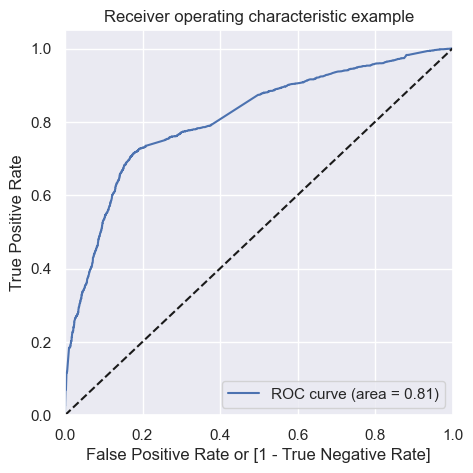

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

## Optimal Threshold

In [138]:
# Creating columns with probability cut-offs

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3103,1,1.000000,2390,1,1,1,1,1,1,1,1,1,1
708,1,1.000000,8763,1,1,1,1,1,1,1,1,1,1
1729,1,1.000000,2443,1,1,1,1,1,1,1,1,1,1
5769,1,0.998727,6620,1,1,1,1,1,1,1,1,1,1
3885,1,0.998332,6712,1,1,1,1,1,1,1,1,1,1


In [139]:
cutoff_df = pd.DataFrame(columns = ['cutoff','accuracy','sensitivity','specificity'])

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final[i])
    total = sum(sum(confusion))
    
    accuracy = (confusion[1,1] + confusion[0,0])/total
    sensitivity = confusion[1,1]/(confusion[1,1]+confusion[1,0])
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.388390     1.000000     0.000000
0.1     0.1  0.415015     0.995217     0.046570
0.2     0.2  0.605263     0.903149     0.416097
0.3     0.3  0.745201     0.750100     0.742091
0.4     0.4  0.781734     0.684735     0.843331
0.5     0.5  0.770279     0.609406     0.872437
0.6     0.6  0.750774     0.506178     0.906100
0.7     0.7  0.721981     0.379035     0.939762
0.8     0.8  0.696594     0.257872     0.975196
0.9     0.9  0.675387     0.180151     0.989876


<Figure size 1200x1200 with 0 Axes>

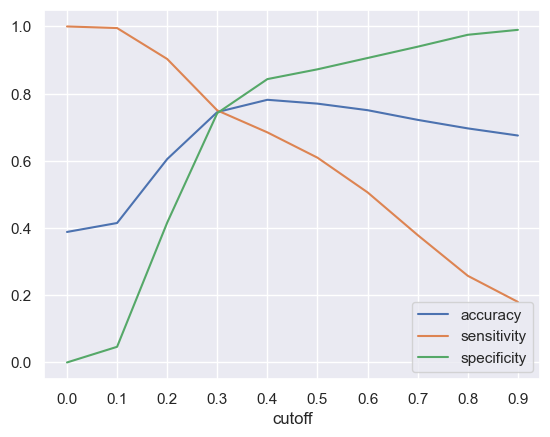

In [140]:
plt.figure(figsize = [12,12])
cutoff_df.plot.line(x = 'cutoff', y = ['accuracy','sensitivity','specificity'])
plt.xticks(numbers)
plt.show()

### Probability Threshold is 0.29 (closer to 0.3) But considering 0.25 to tradeoff sensitivity against accuracy

In [142]:
y_train_pred_final.Predicted = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
confusion

array([[2660, 1291],
       [ 557, 1952]], dtype=int64)

In [144]:
sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
sensitivity*100

77.79992028696692

In [145]:
accuracy = metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
accuracy*100

71.39318885448917

In [146]:
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
specificity*100

67.32472791698304

# Sensitivity for Training Dataset - 79.99%

## Precision and Recall

In [147]:
precision_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.6019118100524206

In [148]:
recall_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.7779992028696692

## Precision Recall Tradeoff

In [150]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

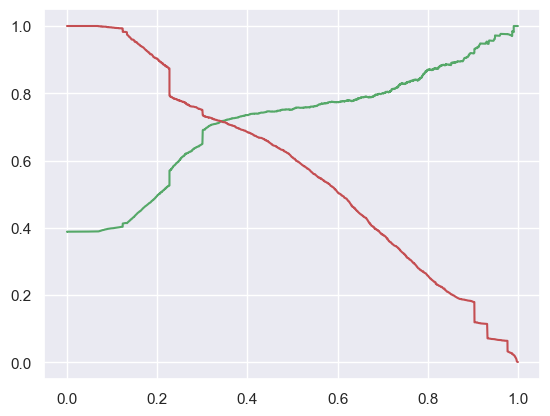

In [151]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

# Predicting on the test set

In [152]:
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) 

In [153]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,What is your current occupation_Student,What is your current occupation_Unemployed
442,0.028169,False,False,False,False,False,True,False,False,False,True
9018,0.125000,False,False,False,False,False,False,False,False,True,False
1841,0.125000,False,False,False,False,False,False,False,False,False,True
2868,0.353433,False,False,False,False,False,False,False,False,False,True
8910,0.061180,False,False,False,False,False,False,False,False,False,True


In [154]:
X_test_sm = sm.add_constant(X_test)